Roberta

In [1]:
!pip install transformers

     |████████████████████████████████| 1.1MB 2.7MB/s 
     |████████████████████████████████| 1.1MB 18.7MB/s 
     |████████████████████████████████| 3.0MB 22.0MB/s 
     |████████████████████████████████| 890kB 47.0MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=508d297a8174963c96550e056278cdce320f4eb2adb8da8ec978a84768030acd
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [2]:
from transformers import DistilBertTokenizer,DistilBertConfig, RobertaConfig, RobertaTokenizer, TFRobertaModel, TFDistilBertModel 
#from transformers import *
import tensorflow as tf
import pandas as pd
import numpy as np
from tqdm import tqdm
import math
from sklearn.model_selection import train_test_split
import tensorflow.keras.backend as K
from sklearn.model_selection import StratifiedKFold
from transformers import *
import tokenizers
from keras import regularizers 
from keras.layers import Dense, Input , Dropout 
from keras.layers import Flatten 
from keras.layers import concatenate 
from keras.layers.embeddings import Embedding 
from keras.models import Model 
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding, TimeDistributed,Bidirectional
from keras.preprocessing.sequence import pad_sequences

print('TF version',tf.__version__)

TF version 2.3.0


In [3]:
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

In [4]:
train_data=pd.read_csv('train_twitter.csv').fillna('')
train_data.head(3)

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative


In [5]:
# We are trying to remove whitespace because it may produce different encodings for same words
def spaces_text(df):
  sent=df['text'].strip()
  return sent

def spaces_st(df):
  sent1=df['selected_text'].strip()  
  return sent1

In [6]:
train_data['text']=train_data.apply(spaces_text,axis=1)
train_data['selected_text']=train_data.apply(spaces_st,axis=1)

In [7]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(train_data,test_size=0.2,stratify=train_data['sentiment'])
print(train.shape)
print(test.shape)

(21984, 4)
(5497, 4)


In [8]:
train_copy=train.copy() 
train_copy=train_copy.reset_index(drop=True) 
train_copy.head(2)

,textID,text,selected_text,sentiment
0,6faba78e87,translation = complicated sh-t that someone is...,complicated sh-t,negative
1,0b0b53bd74,Mummy and Nathan not in today! On My Todd!,Mummy and Nathan not in today! On My Todd!,neutral


In [9]:
test_copy=test.copy() 
test_copy=test_copy.reset_index(drop=True) 
test_copy.head(2)

,textID,text,selected_text,sentiment
0,1e4bcc6393,"come home, then. Not so boring here.",so boring here.,negative
1,c98b54f57f,X-Men:Wolverine was hot! I say go watch it,was hot!,positive


In [10]:
def token(text,tokenizer):
  inputs=[]
  masks=[]
  
  for i in range(text.shape[0]):
    tok=tokenizer(text[i])
    inputs.append(tok['input_ids'])
    masks.append(tok['attention_mask'])
    
  return np.array(inputs),np.array(masks)

In [11]:
tr_feat=token(train_copy.text,tokenizer)


In [12]:
ts_feat=token(test_copy.text,tokenizer)
inputs_ts=ts_feat[0]
masks_ts=ts_feat[1]

In [13]:
inputs_ts

array([list([0, 19807, 184, 6, 172, 4, 1491, 98, 15305, 259, 4, 2]),
       list([0, 1000, 12, 17762, 35, 771, 35934, 833, 21, 2131, 328, 38, 224, 213, 1183, 24, 2]),
       list([0, 560, 5, 82, 939, 21, 326, 11483, 154, 734, 6661, 1028, 16, 1462, 8, 939, 64, 12905, 90, 36839, 24, 4, 1437, 5952, 4342, 30397, 40, 3190, 24, 8, 939, 12905, 890, 24, 124, 30, 3422, 2]),
       ...,
       list([0, 100, 1447, 127, 31955, 10743, 452, 4, 856, 46628, 4783, 5367, 2]),
       list([0, 47519, 734, 38, 197, 213, 146, 10, 86, 3563, 7, 213, 556, 7, 316, 35, 612, 1840, 4356, 16333, 7586, 5534, 32440, 298, 939, 33976, 117, 141, 350, 734, 1437, 3023, 2]),
       list([0, 10431, 8527, 19302, 12997, 21746, 132, 1208, 6, 359, 939, 213, 359, 25805, 11405, 7082, 112, 6, 301, 29384, 12846, 2])],
      dtype=object)

In [14]:
inputs=tr_feat[0]
masks=tr_feat[1]
inputs

array([list([0, 48235, 5457, 6336, 1481, 12, 90, 14, 951, 16, 164, 7, 33, 7, 6396, 162, 2]),
       list([0, 448, 22383, 8, 7738, 45, 11, 452, 328, 374, 1308, 6540, 328, 2]),
       list([0, 713, 2214, 16, 10, 17605, 15, 47, 652, 12846, 1437, 17487, 2054, 640, 3662, 1588, 4, 40523, 73, 34437, 245, 267, 1452, 401, 2]),
       ...,
       list([0, 118, 23126, 517, 7, 20407, 1245, 328, 128, 10913, 6, 939, 531, 213, 7, 5, 784, 3036, 4, 939, 40, 471, 7, 127, 740, 14655, 6, 10932, 955, 821, 895, 11695, 8, 5, 6344, 15056, 4, 2]),
       list([0, 462, 4344, 4, 47, 197, 33, 26, 20760, 328, 2]),
       list([0, 23692, 4, 840, 873, 257, 4, 1437, 178, 122, 40930, 975, 448, 328, 16923, 2653, 29090, 2])],
      dtype=object)

In [15]:
tr_feat[0].shape

(21984,)

In [16]:
tr_feat[0]

array([list([0, 48235, 5457, 6336, 1481, 12, 90, 14, 951, 16, 164, 7, 33, 7, 6396, 162, 2]),
       list([0, 448, 22383, 8, 7738, 45, 11, 452, 328, 374, 1308, 6540, 328, 2]),
       list([0, 713, 2214, 16, 10, 17605, 15, 47, 652, 12846, 1437, 17487, 2054, 640, 3662, 1588, 4, 40523, 73, 34437, 245, 267, 1452, 401, 2]),
       ...,
       list([0, 118, 23126, 517, 7, 20407, 1245, 328, 128, 10913, 6, 939, 531, 213, 7, 5, 784, 3036, 4, 939, 40, 471, 7, 127, 740, 14655, 6, 10932, 955, 821, 895, 11695, 8, 5, 6344, 15056, 4, 2]),
       list([0, 462, 4344, 4, 47, 197, 33, 26, 20760, 328, 2]),
       list([0, 23692, 4, 840, 873, 257, 4, 1437, 178, 122, 40930, 975, 448, 328, 16923, 2653, 29090, 2])],
      dtype=object)

In [17]:
tr_feat[1]

array([list([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
       list([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
       list([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
       ...,
       list([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
       list([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
       list([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])],
      dtype=object)

In [18]:
print(tokenizer.decode(2))
tokenizer.decode(0)

</s>


'<s>'

In [19]:
print(tokenizer.encode(' positive'))
print(tokenizer.encode(' negative'))
print(tokenizer.encode(' neutral'))

[0, 1313, 2]
[0, 2430, 2]
[0, 7974, 2]


<b> Ids for sentiments </b> <br>
Positive ----> 1313 <br>
Negative ----> 2430 <br>
Neutral  ----> 7974 <br>

RoBERTa doesn’t have token_type_ids, you don’t need to indicate which token belongs to which segment. Just separate your segments with the separation token tokenizer.sep_token 

In [20]:
# Adding these ids to the input_ids
sentiment_id = {'positive': 1313, 'negative': 2430, 'neutral': 7974}

In [21]:
type(sentiment_id['positive'])

int

In [22]:
'''
for i in range(train_copy.shape[0]):
  masks[i]=masks[i] + [1]*3
  inputs[i]=inputs[i]+[2]+[sentiment_id[train_copy['sentiment'][i]]]+[2]
'''

In [23]:
len(inputs[3])

23

In [24]:
len(masks[3])

23

In [25]:
'''
for i in range(test_copy.shape[0]):
  inputs_ts[i]=inputs_ts[i]+[2]+[sentiment_id[train_copy['sentiment'][i]]]+[2]
  masks_ts[i]=masks_ts[i] + [1]*3
'''

In [22]:
inputs_ts

array([list([0, 19807, 184, 6, 172, 4, 1491, 98, 15305, 259, 4, 2]),
       list([0, 1000, 12, 17762, 35, 771, 35934, 833, 21, 2131, 328, 38, 224, 213, 1183, 24, 2]),
       list([0, 560, 5, 82, 939, 21, 326, 11483, 154, 734, 6661, 1028, 16, 1462, 8, 939, 64, 12905, 90, 36839, 24, 4, 1437, 5952, 4342, 30397, 40, 3190, 24, 8, 939, 12905, 890, 24, 124, 30, 3422, 2]),
       ...,
       list([0, 100, 1447, 127, 31955, 10743, 452, 4, 856, 46628, 4783, 5367, 2]),
       list([0, 47519, 734, 38, 197, 213, 146, 10, 86, 3563, 7, 213, 556, 7, 316, 35, 612, 1840, 4356, 16333, 7586, 5534, 32440, 298, 939, 33976, 117, 141, 350, 734, 1437, 3023, 2]),
       list([0, 10431, 8527, 19302, 12997, 21746, 132, 1208, 6, 359, 939, 213, 359, 25805, 11405, 7082, 112, 6, 301, 29384, 12846, 2])],
      dtype=object)

In [23]:
# Paddig them to a fixed size
input_ids_tr=pad_sequences(inputs,padding='post',maxlen=96,value=1)
print(input_ids_tr.shape)
input_ids_tr

(21984, 96)


array([[    0, 48235,  5457, ...,     1,     1,     1],
       [    0,   448, 22383, ...,     1,     1,     1],
       [    0,   713,  2214, ...,     1,     1,     1],
       ...,
       [    0,   118, 23126, ...,     1,     1,     1],
       [    0,   462,  4344, ...,     1,     1,     1],
       [    0, 23692,     4, ...,     1,     1,     1]], dtype=int32)

In [24]:
# Paddig them to a fixed size
input_ids_ts=pad_sequences(inputs_ts,padding='post',maxlen=96,value=1)
print(input_ids_ts.shape)
input_ids_ts

(5497, 96)


array([[    0, 19807,   184, ...,     1,     1,     1],
       [    0,  1000,    12, ...,     1,     1,     1],
       [    0,   560,     5, ...,     1,     1,     1],
       ...,
       [    0,   100,  1447, ...,     1,     1,     1],
       [    0, 47519,   734, ...,     1,     1,     1],
       [    0, 10431,  8527, ...,     1,     1,     1]], dtype=int32)

In [25]:
attention_masks_tr=pad_sequences(masks,padding='post',maxlen=96)
print(attention_masks_tr.shape)
attention_masks_tr

(21984, 96)


array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)

In [26]:
attention_masks_ts=pad_sequences(masks_ts,padding='post',maxlen=96)
print(attention_masks_ts.shape)
attention_masks_ts

(5497, 96)


array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)

In [27]:
train_copy.head()

,textID,text,selected_text,sentiment
0,6faba78e87,translation = complicated sh-t that someone is...,complicated sh-t,negative
1,0b0b53bd74,Mummy and Nathan not in today! On My Todd!,Mummy and Nathan not in today! On My Todd!,neutral
2,cc73efff2b,This song is a slap on you face!! ? http://bl...,This song is a slap on you face!! ? http://bl...,negative
3,894782cf8a,Good days with good friends make me not regret...,Good days with good friends ma,positive
4,7452b730f8,Yeah ill make sure i keep you updated.. i get ...,Yeah ill make sure i keep you updated.. i get ...,neutral


In [28]:
def labels(df):  
  string=df['text']  
  words=list(string.split())  
  l=len(words)  
  label=np.zeros(l)  
  label.astype(np.bool)  
  target=df['selected_text']  
  st_words=list(target.split())  
  for i in st_words:    
    try:      
      num=words.index(i)      
      label[num]=1    
    except ValueError:            
      pass    
  return label
train_copy['labels']=train_copy.apply(labels,axis=1)  
test_copy['labels']=test_copy.apply(labels,axis=1)  
train_copy.head(2)

,textID,text,selected_text,sentiment,labels
0,6faba78e87,translation = complicated sh-t that someone is...,complicated sh-t,negative,"[0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,0b0b53bd74,Mummy and Nathan not in today! On My Todd!,Mummy and Nathan not in today! On My Todd!,neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]"


In [29]:
test_copy.head()

,textID,text,selected_text,sentiment,labels
0,1e4bcc6393,"come home, then. Not so boring here.",so boring here.,negative,"[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0]"
1,c98b54f57f,X-Men:Wolverine was hot! I say go watch it,was hot!,positive,"[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
2,3c66250da9,to the people i was txting... sorry phone is d...,to the people i was txting... sorry phone is d...,neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
3,30e7601bce,i know! i wish she would. I just wanna cuddle...,i wish,positive,"[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,95fe7c81b9,I was just watching some cartoons as I haven`t...,I was just watching some cartoons as I haven`t...,neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, ..."


In [30]:
test_copy['labels'][0]

array([0., 0., 0., 0., 1., 1., 1.])

In [31]:
from keras.preprocessing.sequence import pad_sequences
y_pad_ts=pad_sequences(test_copy['labels'],maxlen=96, padding='post',value=2) 
#y_ts_pad=pad_sequences(Y_test,maxlen=50, padding='post') 
print(y_pad_ts.shape) 
print(type(y_pad_ts)) 
print(y_pad_ts)

(5497, 96)
<class 'numpy.ndarray'>
[[0 0 0 ... 2 2 2]
 [0 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 ...
 [0 1 0 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 [0 0 0 ... 2 2 2]]


In [32]:
y_pad_tr=pad_sequences(train_copy['labels'],maxlen=96, padding='post',value=2) 
#y_ts_pad=pad_sequences(Y_test,maxlen=50, padding='post') 
print(y_pad_tr.shape) 
print(type(y_pad_tr)) 
print(y_pad_tr)

(21984, 96)
<class 'numpy.ndarray'>
[[0 0 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 ...
 [0 0 0 ... 2 2 2]
 [1 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]]


In [33]:
start_tr=np.zeros((len(y_pad_tr),96))
for i in range(y_pad_tr.shape[0]):
  for j in range(96):
    if(y_pad_tr[i][j]==1):
      start_tr[i][j]=1
      break

In [34]:
start_ts=np.zeros((len(y_pad_ts),96))
for i in range(y_pad_ts.shape[0]):
  for j in range(96):
    if(y_pad_ts[i][j]==1):
      start_ts[i][j]=1
      break

In [35]:
end_tr=np.zeros((len(y_pad_tr),96))
for i in range(y_pad_tr.shape[0]):
  for j in range(95,-1,-1):
    if(y_pad_tr[i][j]==1):
      end_tr[i][j]=1
      break

In [36]:
end_ts=np.zeros((len(y_pad_ts),96))
for i in range(y_pad_ts.shape[0]):
  for j in range(95,-1,-1):
    if(y_pad_ts[i][j]==1):
      end_ts[i][j]=1
      break

In [37]:
train_copy.labels[1]

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [38]:
start_tr[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [39]:
end_tr[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [40]:
model = TFRobertaModel.from_pretrained('roberta-base')

Some weights of the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


In [41]:
start_tr.shape

(21984, 96)

In [42]:
y_pad_tr.shape

(21984, 96)

In [43]:
Y_tr=np.reshape(y_pad_tr,(-1,96,1)) 
print(Y_tr.shape) 
Y_ts=np.reshape(y_pad_ts,(-1,96,1)) 
print(Y_ts.shape)

(21984, 96, 1)
(5497, 96, 1)


In [44]:
def maskedLoss(y_true, y_pred):    
  loss_function = tf.keras.losses.BinaryCrossentropy(from_logits=False, reduction='none')
 #getting mask value    
  mask = tf.math.logical_not(tf.math.equal(y_true, 2))
 
 #calculating the loss    
  loss_ = loss_function(y_true, y_pred)    
  loss_=tf.reshape(loss_,(-1,96,1))    
 #print(loss_)    
 #print(loss_.shape)
 
 #converting mask dtype to loss_ dtype    
  mask = tf.cast(mask, dtype='int32')
 
 #applying the mask to loss    
  loss_ = loss_*mask    
 #print(loss_)
 
 #getting mean over all the values    
  loss_ = tf.reduce_sum(loss_)/tf.reduce_sum(mask)    
  return loss_


In [45]:
def build_model():
    MAX_LEN=96
    ids = tf.keras.layers.Input((MAX_LEN,), dtype=tf.int32)
    att = tf.keras.layers.Input((MAX_LEN,), dtype=tf.int32)

    bert_model = TFRobertaModel.from_pretrained('roberta-base')
    roberta = bert_model(ids,attention_mask=att)
    
    drop1 = tf.keras.layers.Dropout(0.1)(roberta[0]) 
    conv1 = tf.keras.layers.Conv1D(1,1)(drop1)
    flat1 = tf.keras.layers.Flatten()(conv1)
    out1 = tf.keras.layers.Activation('softmax')(flat1)
    
    drop2 = tf.keras.layers.Dropout(0.1)(roberta[0]) 
    conv2 = tf.keras.layers.Conv1D(1,1)(drop2)
    flat2 = tf.keras.layers.Flatten()(conv2)
    out2 = tf.keras.layers.Activation('softmax')(flat2)
    
    model = tf.keras.models.Model(inputs=[ids, att,], outputs=[out1,out2])
    optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

In [47]:
model=build_model()
model.summary()

Some weights of the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 96)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 96)]         0                                            
__________________________________________________________________________________________________
tf_roberta_model_1 (TFRobertaMo ((None, 96, 768), (N 124645632   input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
dropout_74 (Dropout)            (None, 96, 768)      0           tf_roberta_model_1[0][

In [48]:
#model=build_model1()
#model.summary()

In [49]:
#from keras.utils import plot_model
#plot_model(model, show_shapes=True,show_layer_names=True, to_file='model1.png')

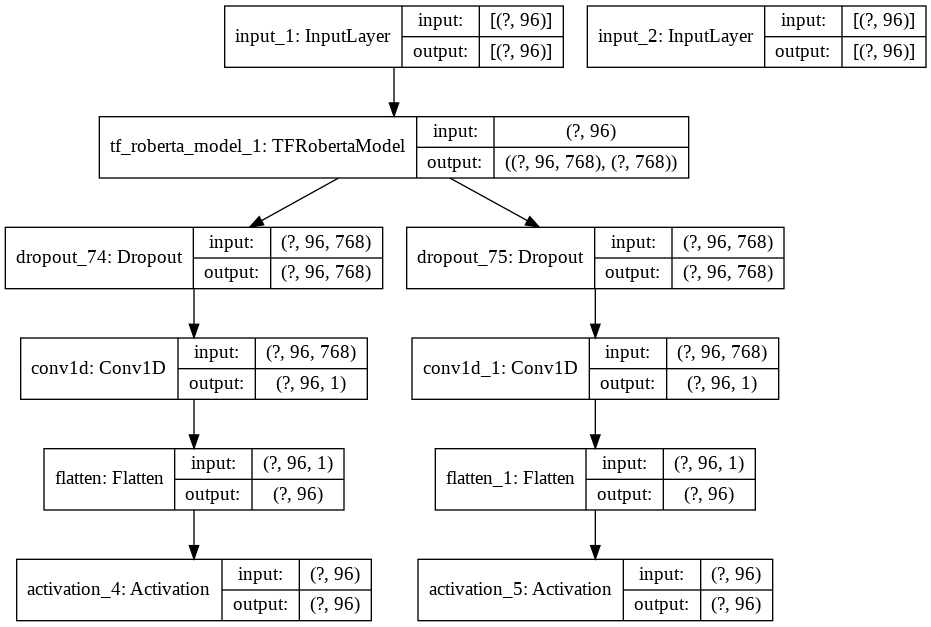

In [50]:
from keras.utils import plot_model
plot_model(model, show_shapes=True,show_layer_names=True, to_file='model1.png')

In [51]:
input_ids_tr

array([[    0, 48235,  5457, ...,     1,     1,     1],
       [    0,   448, 22383, ...,     1,     1,     1],
       [    0,   713,  2214, ...,     1,     1,     1],
       ...,
       [    0,   118, 23126, ...,     1,     1,     1],
       [    0,   462,  4344, ...,     1,     1,     1],
       [    0, 23692,     4, ...,     1,     1,     1]], dtype=int32)

In [52]:
from keras.callbacks import ModelCheckpoint,TensorBoard,ReduceLROnPlateau, EarlyStopping
import os
import datetime
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=3, verbose=1) 
#mc = ModelCheckpoint('model.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1) 
logdir = os.path.join("model", datetime.datetime.now().strftime("%Y%m%d-%H%M%S")) 
tb1 = TensorBoard(log_dir=logdir)

In [53]:
y_pad_tr

array([[0, 0, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 2, 2, 2],
       [1, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2]], dtype=int32)

In [54]:
hist = model.fit([input_ids_tr,attention_masks_tr,],[start_tr,end_tr],
                validation_data = ([input_ids_ts, attention_masks_ts], [start_ts,end_ts]),
                epochs=3, batch_size=32,verbose=1,callbacks=[es])

Epoch 1/3
687/687 [==============================] - 272s 397ms/step - loss: 3.6499 - activation_4_loss: 1.5028 - activation_5_loss: 2.1471 - activation_4_accuracy: 0.5849 - activation_5_accuracy: 0.2666 - val_loss: 2.6702 - val_activation_4_loss: 1.1694 - val_activation_5_loss: 1.5008 - val_activation_4_accuracy: 0.6291 - val_activation_5_accuracy: 0.4693
Epoch 2/3
687/687 [==============================] - 269s 392ms/step - loss: 2.7359 - activation_4_loss: 1.2226 - activation_5_loss: 1.5133 - activation_4_accuracy: 0.6100 - activation_5_accuracy: 0.4673 - val_loss: 2.4503 - val_activation_4_loss: 1.1137 - val_activation_5_loss: 1.3366 - val_activation_4_accuracy: 0.6445 - val_activation_5_accuracy: 0.5330
Epoch 3/3
687/687 [==============================] - 269s 392ms/step - loss: 2.4476 - activation_4_loss: 1.1215 - activation_5_loss: 1.3261 - activation_4_accuracy: 0.6324 - activation_5_accuracy: 0.5287 - val_loss: 2.3263 - val_activation_4_loss: 1.0737 - val_activation_5_loss: 1.

In [55]:
#hist = model.fit([input_ids_tr,attention_masks_tr,],y_pad_tr,
#                validation_data = ([input_ids_ts, attention_masks_ts], y_pad_ts),
#                epochs=3, batch_size=96,verbose=1,callbacks=[es])

In [56]:
pred=model.predict([input_ids_ts,attention_masks_ts])

In [57]:
print(len(pred))
start=pred[0]
end=pred[1]
print(start.shape)
print(end.shape)

2
(5497, 96)
(5497, 96)


In [58]:
start

array([[2.7682942e-01, 8.2828505e-03, 3.4968145e-02, ..., 4.8079433e-05,
        4.8079433e-05, 4.8079433e-05],
       [6.3088840e-01, 1.1532011e-01, 1.5499856e-01, ..., 1.0717412e-04,
        1.0717412e-04, 1.0717412e-04],
       [4.6023291e-01, 3.2008432e-02, 3.0167025e-02, ..., 9.6421711e-05,
        9.6421711e-05, 9.6421711e-05],
       ...,
       [4.5046708e-01, 4.3067902e-01, 1.6175881e-03, ..., 1.7297207e-04,
        1.7297207e-04, 1.7297207e-04],
       [1.8874121e-01, 3.0025056e-02, 2.1915367e-02, ..., 1.6722572e-04,
        1.6722572e-04, 1.6722572e-04],
       [5.8179647e-02, 8.5069239e-03, 3.5893705e-03, ..., 2.8338784e-04,
        2.8338784e-04, 2.8338784e-04]], dtype=float32)

In [59]:
test_copy.head()

,textID,text,selected_text,sentiment,labels
0,1e4bcc6393,"come home, then. Not so boring here.",so boring here.,negative,"[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0]"
1,c98b54f57f,X-Men:Wolverine was hot! I say go watch it,was hot!,positive,"[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
2,3c66250da9,to the people i was txting... sorry phone is d...,to the people i was txting... sorry phone is d...,neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
3,30e7601bce,i know! i wish she would. I just wanna cuddle...,i wish,positive,"[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,95fe7c81b9,I was just watching some cartoons as I haven`t...,I was just watching some cartoons as I haven`t...,neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, ..."


In [60]:
print(np.argmax(start[0]))
print(np.argmax(end[0]))

3
6


In [61]:
print(np.argmax(start_ts[0]))
np.argmax(end_ts[0])

4


6

In [62]:
test_copy['first']=np.nan
test_copy['last']=np.nan
for i in range(test_copy.shape[0]):
  test_copy['first'][i]=np.argmax(start[i])
  test_copy['last'][i]=np.argmax(end[i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [63]:
test_copy.head()

,textID,text,selected_text,sentiment,labels,first,last
0,1e4bcc6393,"come home, then. Not so boring here.",so boring here.,negative,"[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0]",3.0,6.0
1,c98b54f57f,X-Men:Wolverine was hot! I say go watch it,was hot!,positive,"[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.0,6.0
2,3c66250da9,to the people i was txting... sorry phone is d...,to the people i was txting... sorry phone is d...,neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.0,25.0
3,30e7601bce,i know! i wish she would. I just wanna cuddle...,i wish,positive,"[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,19.0
4,95fe7c81b9,I was just watching some cartoons as I haven`t...,I was just watching some cartoons as I haven`t...,neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, ...",0.0,20.0


In [64]:
def dec(df):
  sent=df['text']
  sentence=list(sent.split())
  length=len(sentence)  
  a=int(df['first'])  
  b=int(df['last'])  
  s=''  
  if (a>b):
    s+=df['text']
  elif (b>=length):
    b=min(b,length)
    for i in range(a,b):
      s+=str(sentence[i])+' '
  else:
    for i in range(a,b+1):
      s+=str(sentence[i])+' '       
  return s.strip() 

In [65]:
test_copy['pred']=test_copy.apply(dec,axis=1)
test_copy.head(2)

,textID,text,selected_text,sentiment,labels,first,last,pred
0,1e4bcc6393,"come home, then. Not so boring here.",so boring here.,negative,"[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0]",3.0,6.0,Not so boring here.
1,c98b54f57f,X-Men:Wolverine was hot! I say go watch it,was hot!,positive,"[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.0,6.0,X-Men:Wolverine was hot! I say go watch


In [66]:
def jaccard1(df):      
  str1=df['selected_text']      
  str2=df['pred']          
  a = set(str1.lower().split())       
  b = set(str2.lower().split())      
  c = a.intersection(b)      
  try:    
    return float(len(c)) / (len(a) + len(b) - len(c))  
  except ZeroDivisionError:    
    return 0

In [67]:
test_copy['jaccard']=test_copy.apply(jaccard1,axis=1) 
test_copy.head()

,textID,text,selected_text,sentiment,labels,first,last,pred,jaccard
0,1e4bcc6393,"come home, then. Not so boring here.",so boring here.,negative,"[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0]",3.0,6.0,Not so boring here.,0.750000
1,c98b54f57f,X-Men:Wolverine was hot! I say go watch it,was hot!,positive,"[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.0,6.0,X-Men:Wolverine was hot! I say go watch,0.285714
2,3c66250da9,to the people i was txting... sorry phone is d...,to the people i was txting... sorry phone is d...,neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.0,25.0,to the people i was txting... sorry phone is d...,1.000000
3,30e7601bce,i know! i wish she would. I just wanna cuddle...,i wish,positive,"[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,19.0,i know! i wish she would. I just wanna cuddle ...,0.117647
4,95fe7c81b9,I was just watching some cartoons as I haven`t...,I was just watching some cartoons as I haven`t...,neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, ...",0.0,20.0,I was just watching some cartoons as I haven`t...,1.000000


In [68]:
test_copy.tail(10)

,textID,text,selected_text,sentiment,labels,first,last,pred,jaccard
5487,ab56747ae1,I have to pee.,I have to pee.,neutral,"[1.0, 1.0, 1.0, 1.0]",0.0,3.0,I have to pee.,1.000000
5488,84eea3d90e,Sleepy time! Happy Mothers` Day to current and...,Happy Mothers` Day,positive,"[0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",2.0,2.0,Happy,0.333333
5489,b595c6c4f4,too many Germï¿½n rodrï¿½guez`s results. Which...,too many Germï¿½n rodrï¿½guez`s results. Which...,neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.0,21.0,too many Germï¿½n rodrï¿½guez`s results. Which...,1.000000
5490,d3994c8a1b,"Well let`s be blessed together then too! Yes, ...",blessed,positive,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,22.0,"Well let`s be blessed together then too! Yes, ...",0.047619
5491,1375e54e9d,"Finally made it through Dead Space, that only ...","Finally made it through Dead Space, that only ...",neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.0,11.0,"Finally made it through Dead Space, that only ...",1.000000
5492,ce946643d5,i JUST **** cleaned the whole kitchen....and t...,**** comes home & is going to make a mess of it..,negative,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,25.0,i JUST **** cleaned the whole kitchen....and t...,0.458333
5493,7fc99dd05a,White House? This thing`s a lifesaver: http:/...,lifesaver:,positive,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]",5.0,5.0,lifesaver:,1.000000
5494,3571155c9f,I failed my maths exam today. fxxxmylife,failed,negative,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.0,1.0,I failed,0.500000
5495,09eecf9508,Hmm... I should go make a time machine to go f...,Hmm... I should go make a time machine to go f...,neutral,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",15.0,15.0,genius..,0.047619
5496,67d8083360,"#bigfanfriday 2day, & i go & friggin loose 1, ...",life sucks!!,negative,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",10.0,10.0,sucks!!,0.500000


In [69]:
test_copy['jaccard'].mean()

0.6247334722381158

In [70]:
test_copy[test_copy['sentiment']=='positive']['jaccard'].mean()

0.44634082061541835

In [71]:
test_copy[test_copy['sentiment']=='negative']['jaccard'].mean()

0.4508432813948525

In [72]:
test_copy[test_copy['sentiment']=='neutral']['jaccard'].mean()

0.8841189577544352